In [16]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
def extract_tl(tl_list):
    x_list = []
    for tl in tl_list:
        for x in tl.trajectory_length:
            x_list.append(x)
    
    x_list = np.array(x_list).reshape(len(tl_list), -1)
    x_list = np.mean(np.log10(x_list), axis=0)
    return x_list

# Expressivity

## Untrained

In [18]:
tl_list1 = loader(data_path("tl_expressivity_width_4_reps_2"))
tl_list2 = loader(data_path("tl_expressivity_width_5_reps_2"))
tl_list3 = loader(data_path("tl_expressivity_width_6_reps_2"))
tl_list4 = loader(data_path("tl_expressivity_width_7_reps_2"))
tl_list5 = loader(data_path("tl_expressivity_width_8_reps_2"))
tl_dnn_list = loader(data_path("tl_expressivity_dnn"))

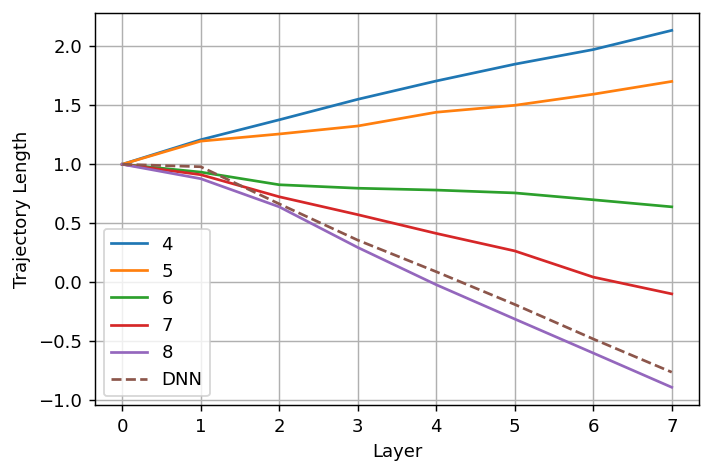

In [19]:
fig=plt.figure(figsize=(6,4), dpi = 130, facecolor='w', edgecolor='k')
plt.plot(extract_tl(tl_list1))
plt.plot(extract_tl(tl_list2))
plt.plot(extract_tl(tl_list3))
plt.plot(extract_tl(tl_list4))
plt.plot(extract_tl(tl_list5))
plt.plot(extract_tl(tl_dnn_list), "--")
plt.xlabel("Layer")
plt.ylabel("Trajectory Length")
plt.legend(["4", "5", "6", "7", "8", "DNN"])
plt.grid()
fig.savefig(image_path("TL_untrained.pdf"), bbox_inches='tight')
plt.show()

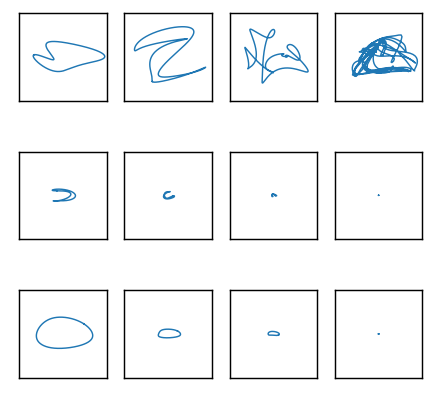

In [20]:
x_proj1 = tl_list1[0].trajectory_projection
x_proj2 = tl_list5[0].trajectory_projection
x_proj3 = tl_dnn_list[0].trajectory_projection

fig, axes = plt.subplots(3, 4, figsize=(4,4), dpi = 130, facecolor='w', edgecolor='k')
for ax1 in axes:
    for ax2 in ax1:
        ax2.set_xticks([])
        ax2.set_yticks([])

lim = [-3,3]

axes[0,0].plot(x_proj1[1][:,0], x_proj1[1][:,1], linewidth=0.8)
axes[0,0].set_xlim(lim); axes[0,0].set_ylim(lim); axes[0,0].set_aspect("equal")

axes[0,1].plot(x_proj1[2][:,0], x_proj1[2][:,1], linewidth=0.8)
axes[0,1].set_xlim(lim); axes[0,1].set_ylim(lim); axes[0,1].set_aspect("equal")

axes[0,2].plot(x_proj1[3][:,0], x_proj1[3][:,1], linewidth=0.8)
axes[0,2].set_xlim(lim); axes[0,2].set_ylim(lim); axes[0,2].set_aspect("equal")

axes[0,3].plot(x_proj1[7][:,0], x_proj1[7][:,1], linewidth=0.8)
axes[0,3].set_xlim(lim); axes[0,3].set_ylim(lim); axes[0,3].set_aspect("equal")



axes[1,0].plot(x_proj2[1][:,0], x_proj2[1][:,1], linewidth=0.8)
axes[1,0].set_xlim(lim); axes[1,0].set_ylim(lim); axes[1,0].set_aspect("equal")

axes[1,1].plot(x_proj2[2][:,0], x_proj2[2][:,1], linewidth=0.8)
axes[1,1].set_xlim(lim); axes[1,1].set_ylim(lim); axes[1,1].set_aspect("equal")

axes[1,2].plot(x_proj2[3][:,0], x_proj2[3][:,1], linewidth=0.8)
axes[1,2].set_xlim(lim); axes[1,2].set_ylim(lim); axes[1,2].set_aspect("equal")

axes[1,3].plot(x_proj2[7][:,0], x_proj2[7][:,1], linewidth=0.8)
axes[1,3].set_xlim(lim); axes[1,3].set_ylim(lim); axes[1,3].set_aspect("equal")


axes[2,0].plot(x_proj3[1][:,0], x_proj3[1][:,1], linewidth=0.8)
axes[2,0].set_xlim(lim); axes[2,0].set_ylim(lim); axes[2,0].set_aspect("equal")

axes[2,1].plot(x_proj3[2][:,0], x_proj3[2][:,1], linewidth=0.8)
axes[2,1].set_xlim(lim); axes[2,1].set_ylim(lim); axes[2,1].set_aspect("equal")

axes[2,2].plot(x_proj3[3][:,0], x_proj3[3][:,1], linewidth=0.8)
axes[2,2].set_xlim(lim); axes[2,2].set_ylim(lim); axes[2,2].set_aspect("equal")

axes[2,3].plot(x_proj3[7][:,0], x_proj3[7][:,1], linewidth=0.8)
axes[2,3].set_xlim(lim); axes[2,3].set_ylim(lim); axes[2,3].set_aspect("equal")

fig.savefig(image_path("TL_untrained_projection.pdf"), bbox_inches='tight')
plt.show()

## Trained

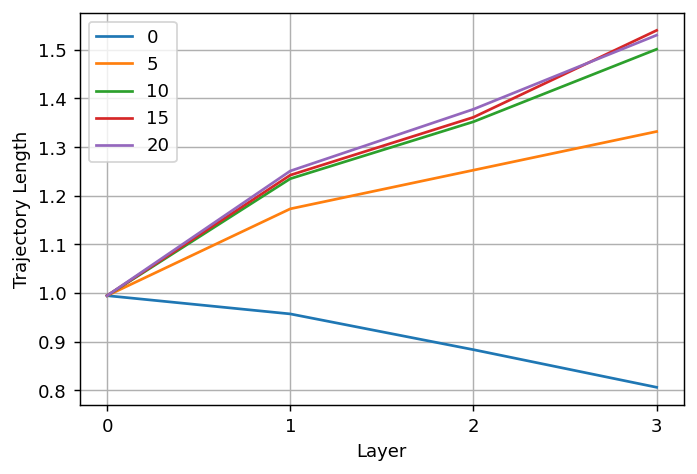

In [50]:
tl_list1 = loader(data_path("tl_expressivity_qubit_6_epochs_0"))
tl_list2 = loader(data_path("tl_expressivity_qubit_6_epochs_5"))
tl_list3 = loader(data_path("tl_expressivity_qubit_6_epochs_10"))
tl_list4 = loader(data_path("tl_expressivity_qubit_6_epochs_15"))
tl_list5 = loader(data_path("tl_expressivity_qubit_6_epochs_20"))

fig, ax =plt.subplots(figsize=(6,4), dpi = 130, facecolor='w', edgecolor='k')
x_ticks = [0, 1, 2, 3]
ax.set_xticks([0, 1, 2, 3])

plt.plot(x_ticks, extract_tl(tl_list1)[:-1])
plt.plot(x_ticks, extract_tl(tl_list2)[:-1])
plt.plot(x_ticks, extract_tl(tl_list3)[:-1])
plt.plot(x_ticks, extract_tl(tl_list4)[:-1])
plt.plot(x_ticks, extract_tl(tl_list5)[:-1])
plt.xlabel("Layer")
plt.ylabel("Trajectory Length")
plt.legend(["0", "5", "10", "15", "20"])
plt.grid()
fig.savefig(image_path("TL_trained_QCN_qubit_6.pdf"), bbox_inches='tight')
plt.show()

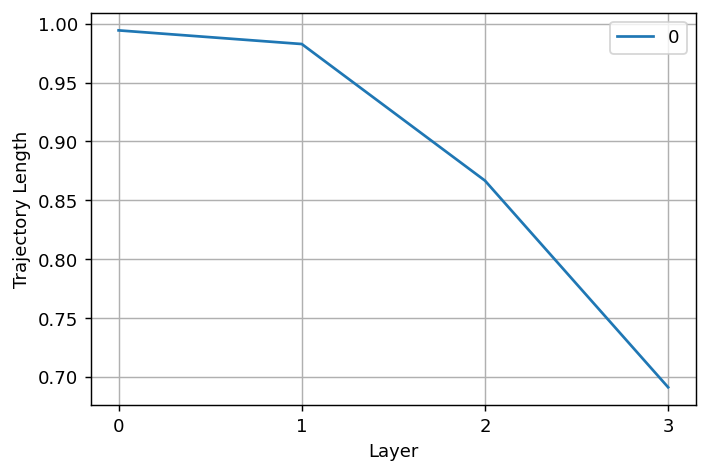

In [51]:
tl_list1 = loader(data_path("tl_expressivity_qubit_7_epochs_0"))
#tl_list2 = loader(data_path("tl_expressivity_qubit_7_epochs_5"))
#tl_list3 = loader(data_path("tl_expressivity_qubit_7_epochs_10"))
#tl_list4 = loader(data_path("tl_expressivity_qubit_7_epochs_15"))
#tl_list5 = loader(data_path("tl_expressivity_qubit_7_epochs_20"))

fig, ax =plt.subplots(figsize=(6,4), dpi = 130, facecolor='w', edgecolor='k')
x_ticks = [0, 1, 2, 3]
ax.set_xticks([0, 1, 2, 3])

plt.plot(x_ticks, extract_tl(tl_list1)[:-1])
#plt.plot(x_ticks, extract_tl(tl_list2)[:-1])
#plt.plot(x_ticks, extract_tl(tl_list3)[:-1])
#plt.plot(x_ticks, extract_tl(tl_list4)[:-1])
#plt.plot(x_ticks, extract_tl(tl_list5)[:-1])
plt.xlabel("Layer")
plt.ylabel("Trajectory Length")
plt.legend(["0", "5", "10", "15", "20"])
plt.grid()
fig.savefig(image_path("TL_trained_QCN_qubit_7.pdf"), bbox_inches='tight')
plt.show()

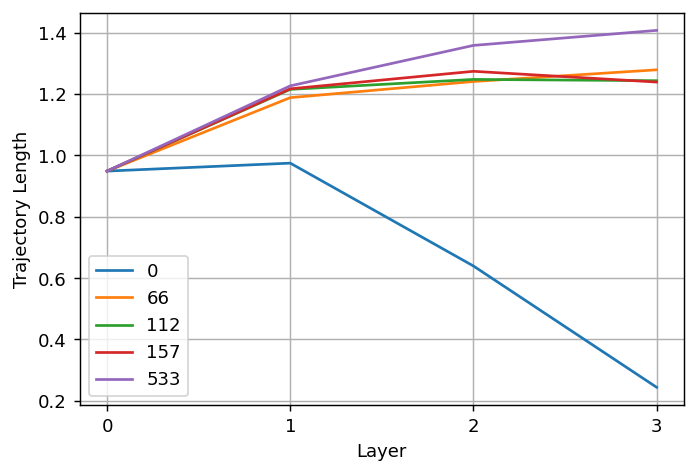

In [52]:
tl1 = loader(data_path("tl_expressivity_epochs_0_dnn"))
tl2 = loader(data_path("tl_expressivity_epochs_66_dnn"))
tl3 = loader(data_path("tl_expressivity_epochs_112_dnn"))
tl4 = loader(data_path("tl_expressivity_epochs_157_dnn"))
tl5 = loader(data_path("tl_expressivity_epochs_533_dnn"))


fig, ax =plt.subplots(figsize=(6,4), dpi = 130, facecolor='w', edgecolor='k')
x_ticks = [0, 1, 2, 3]
ax.set_xticks([0, 1, 2, 3])

plt.plot(x_ticks, [np.log10(x) for x in tl1.trajectory_length[:-1]])
plt.plot(x_ticks, [np.log10(x) for x in tl2.trajectory_length[:-1]])
plt.plot(x_ticks, [np.log10(x) for x in tl3.trajectory_length[:-1]])
plt.plot(x_ticks, [np.log10(x) for x in tl4.trajectory_length[:-1]])
plt.plot(x_ticks, [np.log10(x) for x in tl5.trajectory_length[:-1]])
plt.xlabel("Layer")
plt.ylabel("Trajectory Length")
plt.legend(["0", "66", "112", "157", "533"])
plt.grid()
fig.savefig(image_path("TL_trained_DNN_nodes_8.pdf"), bbox_inches='tight')
plt.show()

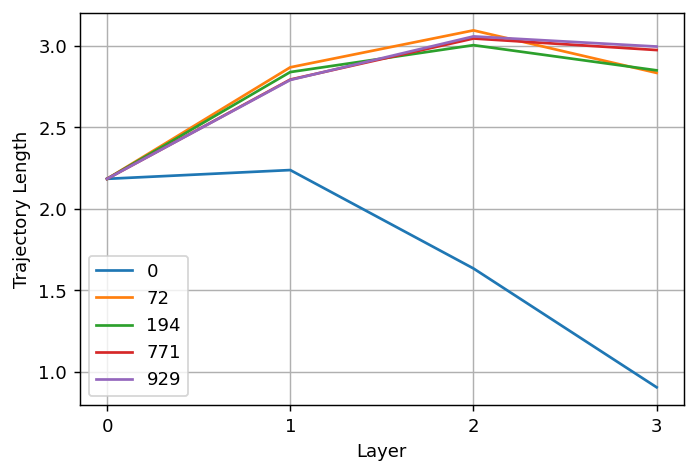

In [15]:
tl1 = loader(data_path("tl_expressivity_epochs_0_dnn_9_nodes"))
tl2 = loader(data_path("tl_expressivity_epochs_72_dnn_9_nodes"))
tl3 = loader(data_path("tl_expressivity_epochs_194_dnn_9_nodes"))
tl4 = loader(data_path("tl_expressivity_epochs_771_dnn_9_nodes"))
tl5 = loader(data_path("tl_expressivity_epochs_929_dnn_9_nodes"))


fig, ax =plt.subplots(figsize=(6,4), dpi = 130, facecolor='w', edgecolor='k')
x_ticks = [0, 1, 2, 3]
ax.set_xticks([0, 1, 2, 3])

plt.plot(x_ticks, [np.log(x) for x in tl1.trajectory_length[:-1]])
plt.plot(x_ticks, [np.log(x) for x in tl2.trajectory_length[:-1]])
plt.plot(x_ticks, [np.log(x) for x in tl3.trajectory_length[:-1]])
plt.plot(x_ticks, [np.log(x) for x in tl4.trajectory_length[:-1]])
plt.plot(x_ticks, [np.log(x) for x in tl5.trajectory_length[:-1]])
plt.xlabel("Layer")
plt.ylabel("Trajectory Length")
plt.legend(["0", "72", "194", "771", "929"])
plt.grid()
fig.savefig(image_path("TL_trained_DNN_nodes_9.pdf"), bbox_inches='tight')
plt.show()